## Basic Plotting with matplotlib

http://www.aosabook.org/en/matplotlib.html

#### Backend layer: 
Deals with rendering of plots to screen or files.<br>
Here we use 'inline' backend. With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document. <br>
#### Artist layer:
Contains containers such as Figure, Subplot, Axes<br>
Contains primitives such as a Line2D, Rectangle, and collections.
#### Scripting Layer
Simplifies access to the Artist and Backend Layer <br>
Here we use 'pyplot' scripting. <br>

The popular JavaScript library, for instance, D3.JS is an example of a declarative information visualization method. While matplotlib's pyplot is an example of a procedural information visualization method.


https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833

You can show matplotlib figures directly in the notebook by using the %matplotlib notebook and %matplotlib inline magic commands. <br>
##### %matplotlib notebook provides an interactive environment.


In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [9]:
import matplotlib.pyplot as plt
plt.tick_params?

<IPython.core.display.Javascript object>


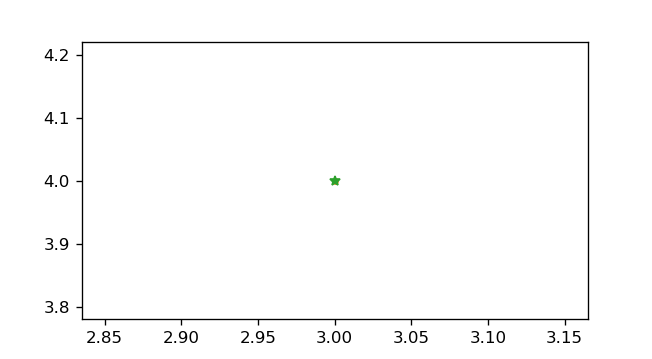

In [4]:
plt.plot(3,4)

In [5]:
plt.plot(3,4,".")

In [7]:
plt.plot(3,4,"*")

Let's see how to make a plot without using the scripting layer.

In [8]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

#create a new figure
fig = Figure()

#associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig
ax = fig.add_subplot(111) # 111 means we just want only one plot

# plot the point
ax.plot(3,4,".")

canvas.print_png('test.png')

In [9]:
%%html
<img src = "test.png" />

<IPython.core.display.Javascript object>


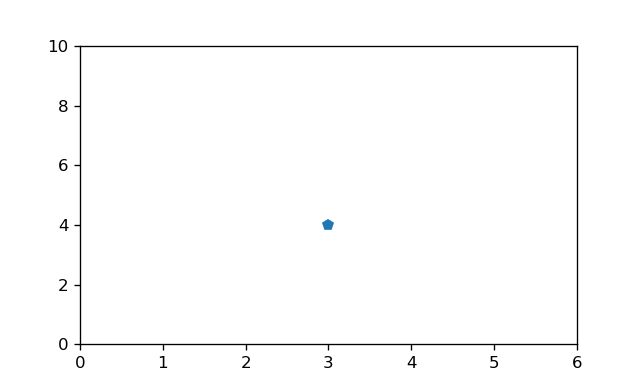

[0, 6, 0, 10]

In [12]:
plt.figure()
plt.plot(3,4,"p")

ax = plt.gca() # get current axes

ax.axis([0,6,0,10]) #set axis boundaries

<IPython.core.display.Javascript object>


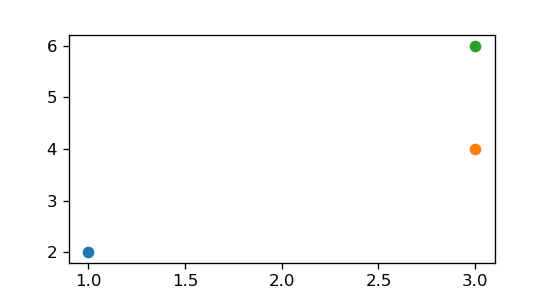

In [13]:
plt.figure()

plt.plot(1,2,'o')
plt.plot(3,4,'o')
plt.plot(3,6,'o')

In [14]:
# for figure 3
ax = plt.gca()
ax.get_children()

 Text(0.5, 1, ''),
 Text(0.0, 1, ''),
 Text(1.0, 1, ''),

### Scatter Plots

<IPython.core.display.Javascript object>


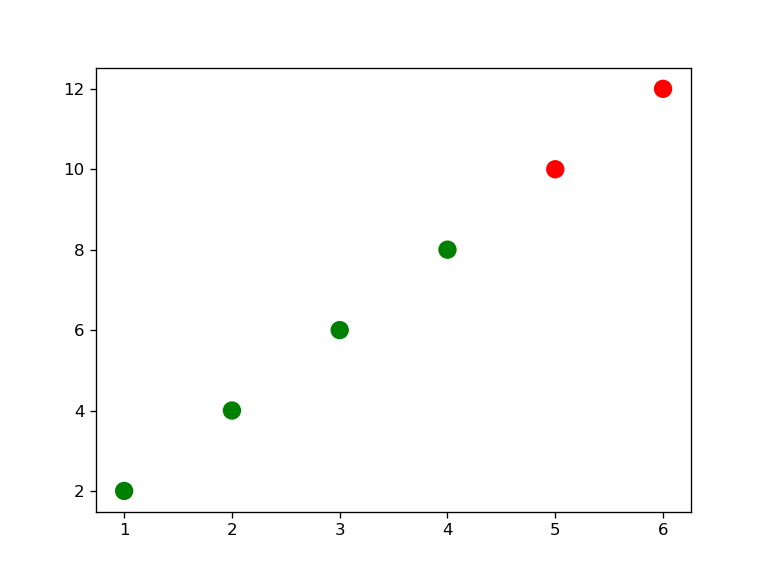

In [17]:
import numpy as np

x = np.array([1,2,3,4,5,6])
y = 2*x

colors = ['green'] * (len(x) - 2)
colors.append('red')
colors.append('red')

plt.figure()

plt.scatter(x, y, s = 100, c = colors) # s - scale of data points

In [18]:
#convert two lists into a list of pairwise tuples
zip_gen = zip([1,2,3,4], [5,6,7,8])

print(zip_gen)

zip_gen = zip([1,2,3,4], [5,6,7,8])
print(*zip_gen)

(1, 5) (2, 6) (3, 7) (4, 8)


In [19]:
print(list(zip((1,5), (2,6), (3,7), (4,8))))

[(1, 2, 3, 4), (5, 6, 7, 8)]


In [22]:
zip_gen = zip([1,2,3,4], [5,6,7,8])

x,y = zip(*zip_gen)
print(x)
print(y)

(1, 2, 3, 4)
(5, 6, 7, 8)


<IPython.core.display.Javascript object>


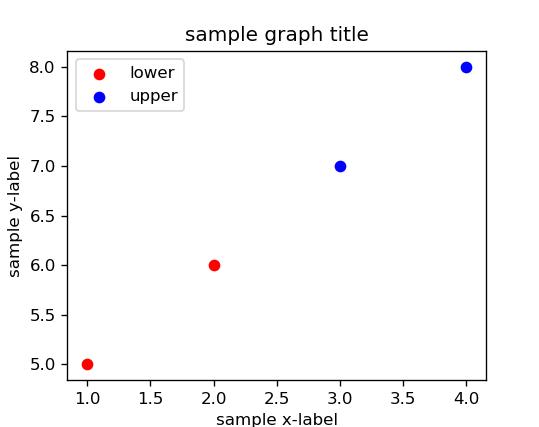

In [23]:
plt.figure()

plt.scatter(x[:2], y[:2], c = "red", label = "lower")
plt.scatter(x[2:], y[2:], c = "blue", label = "upper")

In [24]:
plt.xlabel("sample x-label")
plt.ylabel("sample y-label")

Text(22.6663316057788, 0.5, 'sample y-label')

In [25]:
plt.title("sample graph title")

Text(0.5, 1, 'sample graph title')

In [27]:
plt.legend() # uses labels associated with points

In [28]:
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc = 4, frameon = False, title = "Legend")

In [29]:
plt.gca().get_children()

 Text(0.5, 1, 'sample graph title'),
 Text(0.0, 1, ''),
 Text(1.0, 1, ''),

In [31]:
# get the legend
legend = plt.gca().get_children()[-2]
legend

In [32]:
legend.get_children()

In [33]:
legend.get_children()[0]

In [39]:
# you can use get_children to navigate through the child artists
legend.get_children()[0].get_children()
legend.get_children()[0].get_children()[1].get_children()
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [41]:
from matplotlib.artist import Artist

def get_c(art, depth = 0):
    if isinstance(art, Artist):
        print(" " * depth + str(art))
        for child in art.get_children():
            get_c(child, depth + 2)
            
get_c(plt.legend())

Legend
      Text(0, 0, '')
            Text(0, 0, 'lower')
            Text(0, 0, 'upper')
  FancyBboxPatch((0, 0), width=1, height=1)



<br>

### Line Plots

<IPython.core.display.Javascript object>


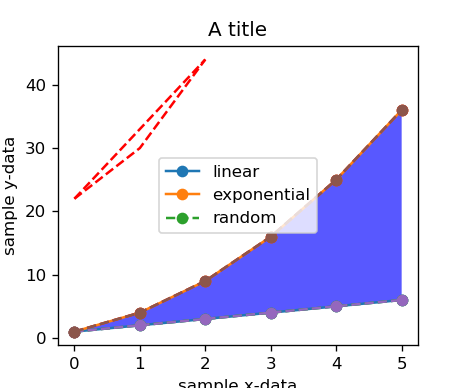

In [42]:
import numpy as np

linear_data = np.array([1,2,3,4,5,6])
exponential_data = linear_data ** 2

plt.figure()
plt.plot(linear_data, '-o', exponential_data, '-o') # solid lines

In [46]:
plt.plot(linear_data, '--o', exponential_data, '--o') # dotted lines

In [48]:
plt.plot([22,30,44], '--r')

In [50]:
plt.xlabel('sample x-data')
plt.ylabel('sample y-data')
plt.title('A title')

Text(0.5, 1, 'A title')

In [53]:
plt.legend(['linear', 'exponential', 'random'])

In [55]:
#fill the area between linear data and exponential data
plt.gca().fill_between(range(len(linear_data)), linear_data, exponential_data, facecolor = "blue", alpha = 0.3)

<IPython.core.display.Javascript object>


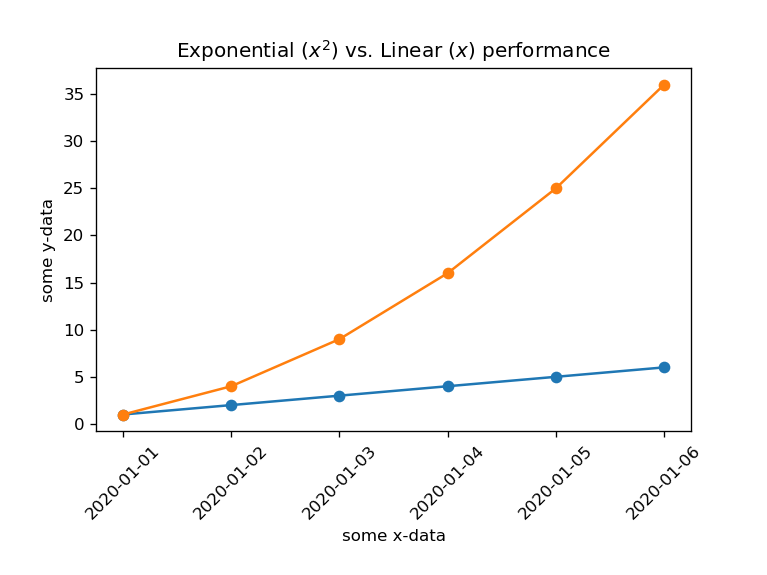

In [63]:
# dates

plt.figure()

observation_dates = np.arange('2020-01-01', '2020-01-07', dtype = 'datetime64[D]') 
linear_data = np.array([1,2,3,4,5,6])
exponential_data = linear_data ** 2


plt.plot(observation_dates, linear_data, '-o', observation_dates, exponential_data, '-o') 

In [75]:
# import pandas as pd

# plt.figure()
# observation_dates = np.arange('2020-01-01', '2020-01-07', dtype = 'datetime64[D]') 
# linear_data = np.array([1,2,3,4,5,6])
# exponential_data = linear_data ** 2

# observation_dates = list(map(pd.to_datetime, observation_dates)) # convert the map to a list to get rid of the error
# plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

In [79]:
x = plt.gca().xaxis

# rotate the tick labels of x-axis 
for item in x.get_ticklabels():
    item.set_rotation(45)
#x.get_children()

In [81]:
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

In [82]:
ax = plt.gca()
ax.set_xlabel('some x-data')
ax.set_ylabel('some y-data')
ax.set_title('some title')

Text(0.5, 1, 'some title')

In [83]:
# you can add mathematical expressions in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance") # laTex Format

Text(0.5, 1, 'Exponential ($x^2$) vs. Linear ($x$) performance')

<br>

### Bar Charts

<IPython.core.display.Javascript object>


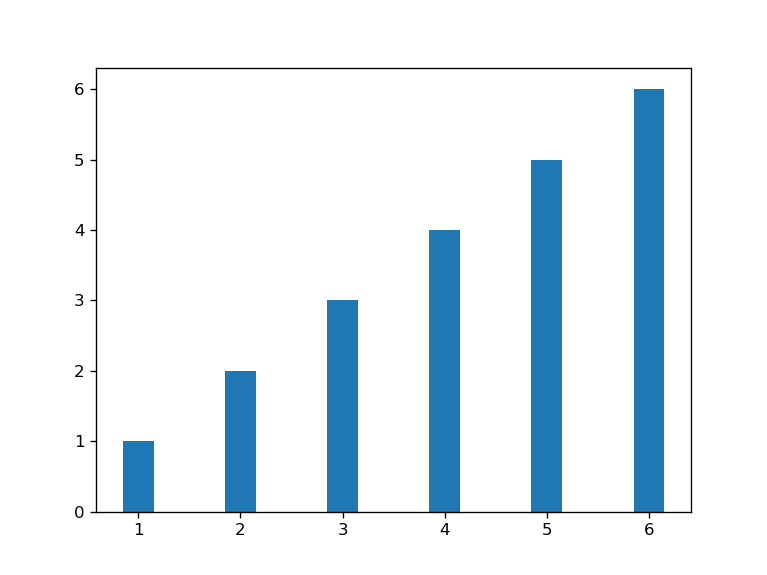

<BarContainer object of 6 artists>

In [125]:
plt.figure()

linear_data = np.array([1,2,3,4,5,6])
exponential_data = linear_data ** 2
xvals = [1,2,3,4,5,6] # x value for each data

plt.bar(xvals, linear_data, width = 0.3)

In [121]:
new_xvals = []
for item in xvals:
    new_xvals.append(item+0.3)
    
plt.bar(new_xvals, exponential_data, width = 0.3)

<BarContainer object of 6 artists>

In [123]:
from random import randint
linear_err = [randint(0,15) for x in range(len(linear_data))]
print(linear_err)

plt.bar(xvals, linear_data, width = 0.3, yerr = linear_err)

[12, 14, 3, 12, 12, 1]


<BarContainer object of 6 artists>

<IPython.core.display.Javascript object>


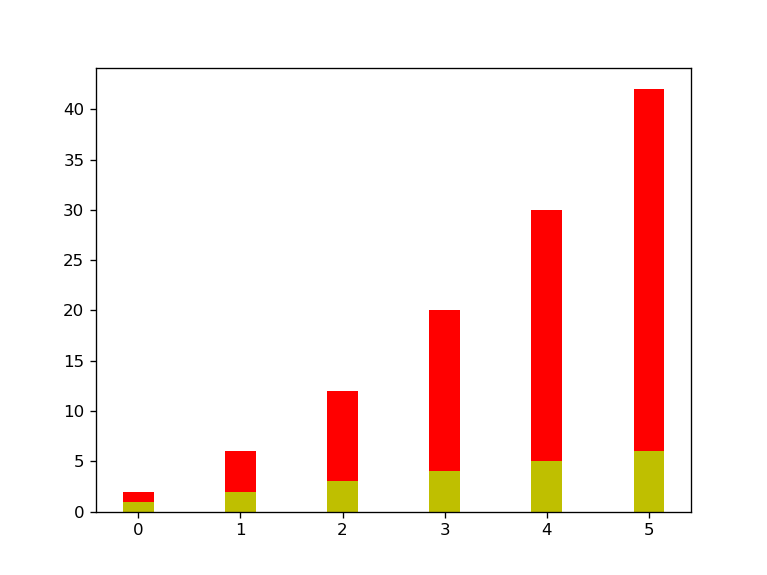

<BarContainer object of 6 artists>

In [126]:
# stacked bar charts
plt.figure()
xvals = range(len(linear_data))

plt.bar(xvals, linear_data, width = 0.3, color = "y")
plt.bar(xvals, exponential_data, width = 0.3, bottom = linear_data, color = "r")

<IPython.core.display.Javascript object>


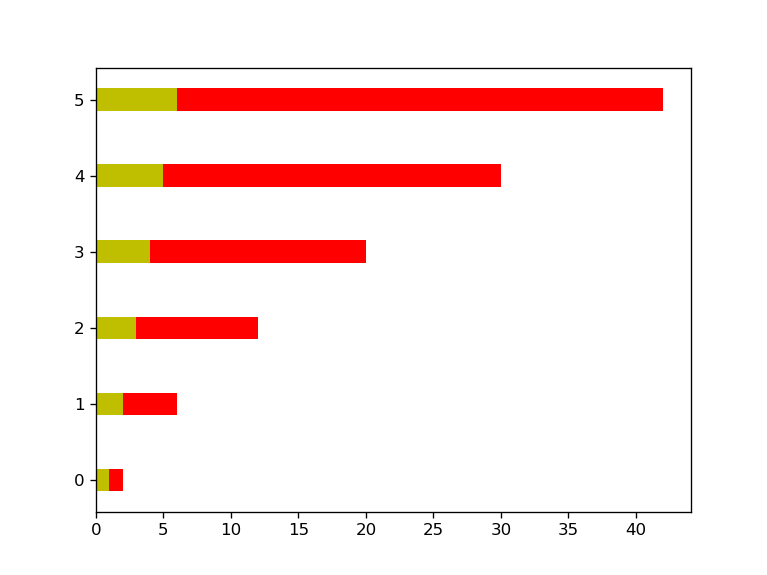

<BarContainer object of 6 artists>

In [131]:
# horizontal bar charts
plt.figure()
yvals = range(len(linear_data))

plt.barh(yvals, linear_data, height = 0.3, color = "y")
plt.barh(yvals, exponential_data, height = 0.3, left = linear_data, color = "r")

### Dejunkifying a Plot 

<IPython.core.display.Javascript object>


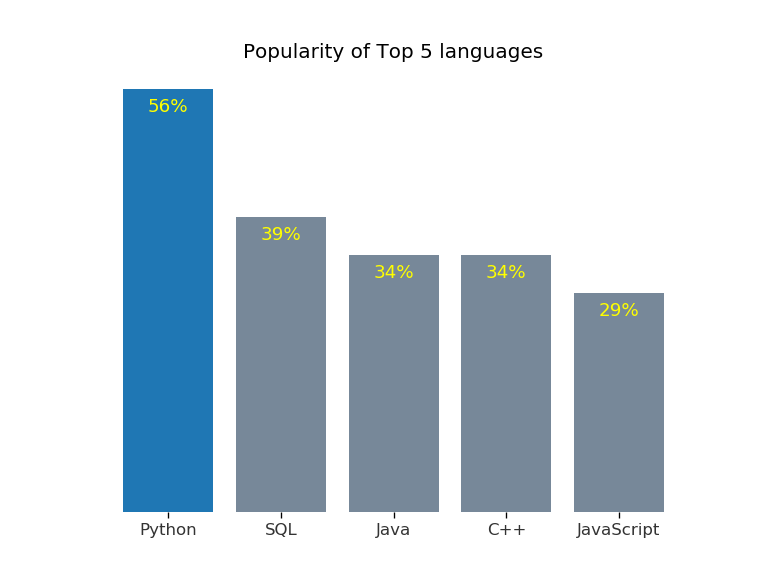

In [38]:
#sample 
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
xpos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(xpos, popularity, align = 'center')
plt.xticks(xpos,languages)
plt.ylabel('% popularity')
plt.title('Popularity of Top 5 languages')


plt.show()

1. Remove all the ticks (both axes), and tick labels on the Y axis

In [39]:
plt.gca().set_yticks([])
plt.gca().set_xticks([])

[]

2. Remove Frame of the chart

In [40]:
for spine in plt.gca().spines.values():
    spine.set_visible(False)

3. Change the bar colors to be less bright blue

In [41]:
bars = plt.bar(xpos, popularity, align = 'center', linewidth = 0, color = "lightslategrey")

4. Make Python bar, a Contrasting Color and soften all labels opacity

In [42]:
bars[0].set_color('#1F77B4')
plt.xticks(xpos, languages, alpha = 0.8)
plt.ylabel("% popularity", alpha = 0.8)

Text(89.33272454473708, 0.5, '% popularity')

5. Remove y-labels and label the each bar independentaly

In [43]:
plt.ylabel("")

for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 3, str(int(bar.get_height())) + '%', ha = "center", color = "yellow", fontsize = 11)

<br><br>
# Subplots

In [2]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.subplot?

<IPython.core.display.Javascript object>


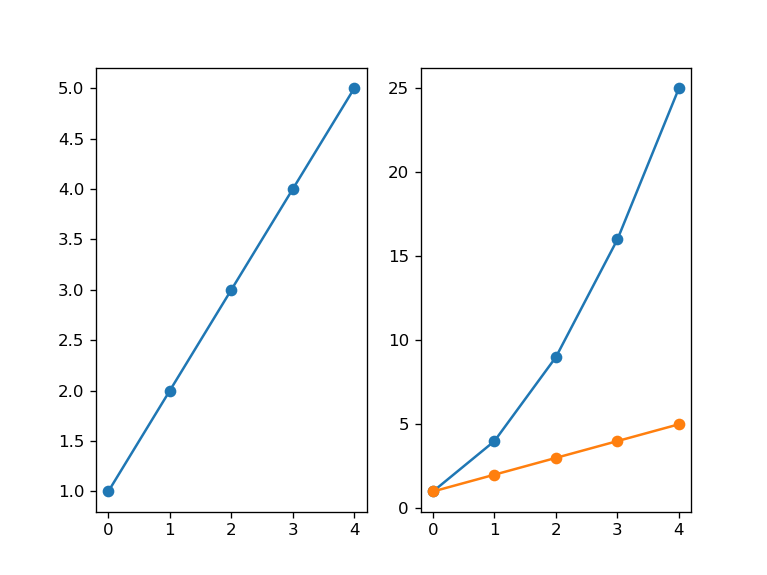

In [10]:
plt.figure()

plt.subplot(1,2,1) # (rows, columns, plot number)

linear_data = np.array([1,2,3,4,5])

plt.plot(linear_data, '-o')

In [11]:
exponential_data = linear_data ** 2
plt.subplot(1,2,2)
plt.plot(exponential_data, '-o')

In [12]:
plt.subplot(1,2,2)
plt.plot(linear_data, '-o')

<ipython-input-12-619cdb855b45>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


<IPython.core.display.Javascript object>


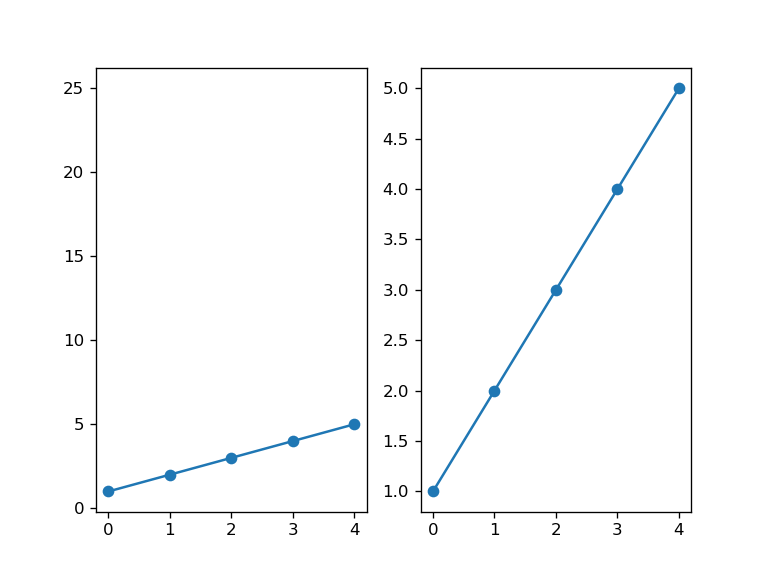

In [8]:
plt.figure()
ax1 = plt.subplot(1,2,1)
plt.plot(linear_data, '-o')

#to ensure that both subplots share same y axis
ax2 = plt.subplot(1,2,2, sharey = ax1)
plt.plot(exponential_data, '-o')

<IPython.core.display.Javascript object>


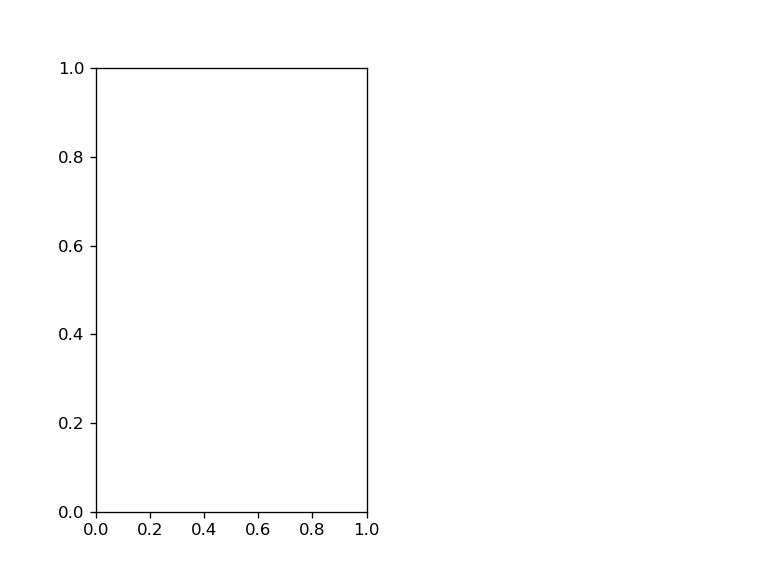

<ipython-input-13-2c808a67d888>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1) == plt.subplot(121)


True

In [13]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


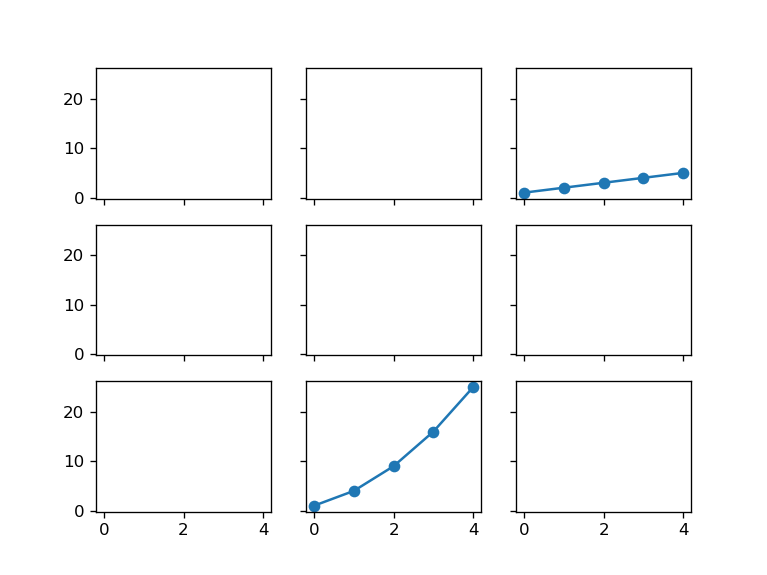

In [21]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3,3, sharex = True, sharey = True)

ax3.plot(linear_data, '-o')
ax8.plot(exponential_data, '-o')

In [26]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)    
# not working ?

In [25]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

<IPython.core.display.Javascript object>


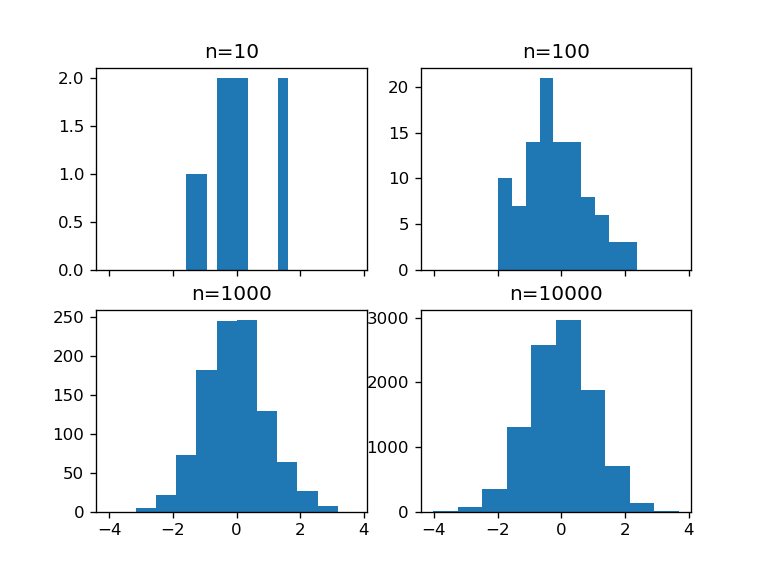

In [28]:
# creare 2*2 grid of subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc = 0.0, scale = 1.0, size = sample_size)
    # loc: mean of the distribution
    # scale: standard deviation of the distribution
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


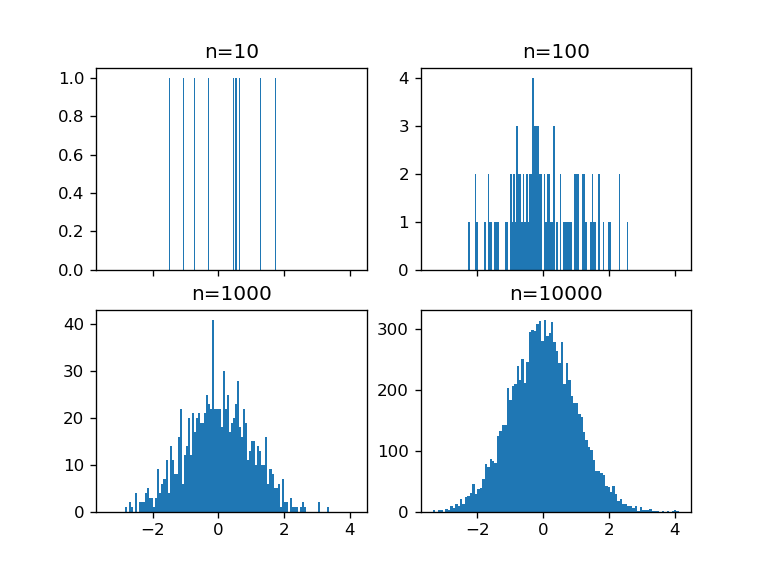

In [32]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc = 0.0, scale = 1.0, size = sample_size)
    # bin size = 100
    axs[n].hist(sample, bins = 100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


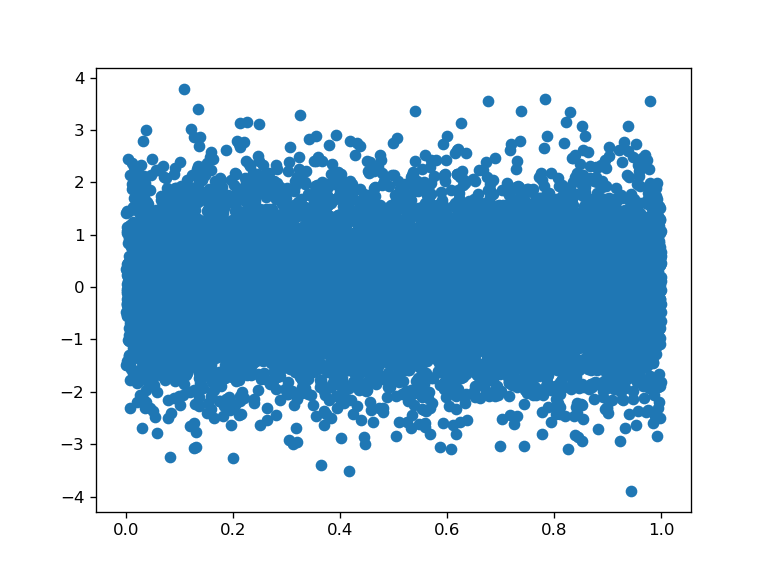

In [36]:
plt.figure()
Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


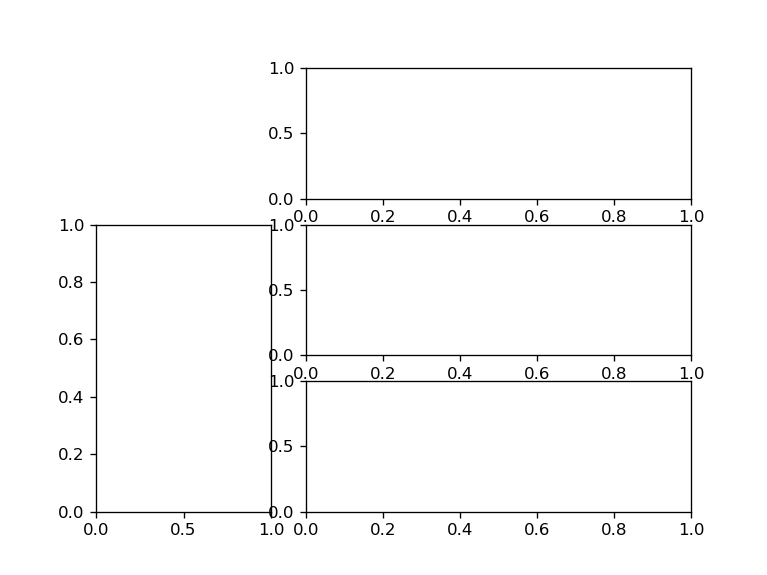

In [41]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_right_hist = plt.subplot(gspec[0,1:]) # occupies 0th row and columns 1 and 2
side_hist = plt.subplot(gspec[1:, 0]) # occupies 1 and 2 rows and 0th col
middle_right_hist = plt.subplot(gspec[1,1:])
bottom_right_hist = plt.subplot(gspec[2:,1:])                    

<IPython.core.display.Javascript object>


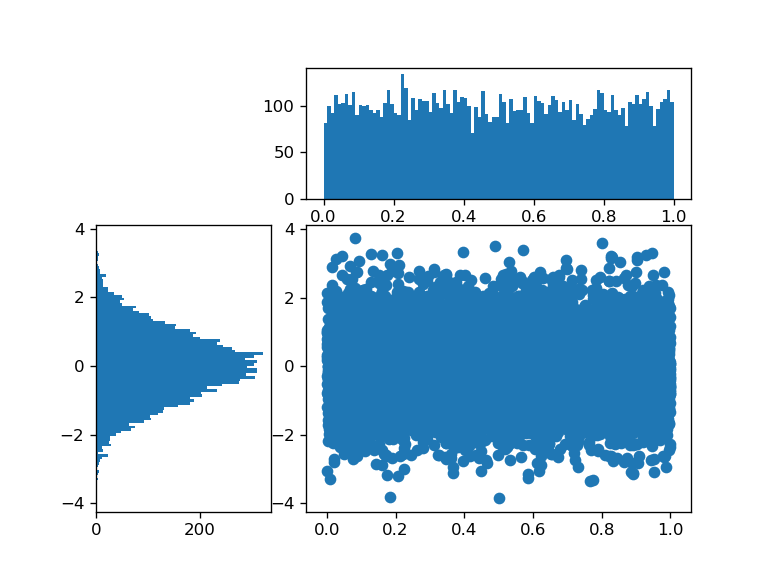

(array([  2.,   0.,   0.,   0.,   0.,   0.,   1.,   3.,   2.,   4.,   5.,
          2.,   4.,   6.,   8.,  11.,  23.,   4.,  13.,  12.,  29.,  25.,
         28.,  27.,  38.,  48.,  67.,  76.,  64.,  93., 107., 105., 119.,
        130., 131., 158., 182., 189., 181., 204., 203., 233., 214., 244.,
        276., 279., 308., 290., 311., 310., 292., 305., 311., 288., 305.,
        322., 268., 263., 246., 233., 240., 201., 188., 193., 182., 152.,
        155., 133., 111., 107., 103.,  83.,  72.,  77.,  51.,  47.,  54.,
         51.,  34.,  24.,  23.,  14.,  13.,  14.,  12.,  19.,   8.,   8.,
          5.,   3.,   2.,   4.,   3.,   5.,   3.,   1.,   0.,   1.,   1.,
          1.]),
 array([-3.85958622, -3.78362193, -3.70765764, -3.63169335, -3.55572907,
        -3.47976478, -3.40380049, -3.3278362 , -3.25187192, -3.17590763,
        -3.09994334, -3.02397905, -2.94801477, -2.87205048, -2.79608619,
        -2.72012191, -2.64415762, -2.56819333, -2.49222904, -2.41626476,
        -2.34030047, -2.26

In [97]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_right_hist = plt.subplot(gspec[0,1:]) 
side_hist = plt.subplot(gspec[1:, 0])
bottom_right_hist = plt.subplot(gspec[1:,1:]) 

Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)

bottom_right_hist.scatter(X, Y)
top_right_hist.hist(X, bins = 100)
side_hist.hist(Y, bins = 100, orientation = "horizontal")

In [49]:
# clear the histograms and plot normed histograms
top_right_hist.clear()
top_right_hist.hist(X, bins = 100, density =True)
side_hist.clear()
side_hist.hist(Y, bins = 100, density = True)

side_hist.invert_xaxis()

In [51]:
# change axes limits
for ax in [top_right_hist, bottom_right_hist]:
    ax.set_xlim(0, 1)
for ax in [side_hist, bottom_right_hist]:
    ax.set_ylim(-4, 4)

# Box and Whisker plots

In [54]:
import pandas as pd

normal_sample = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
random_sample = np.random.random(size = 10000)
gamma_sample = np.random.gamma(2, size = 10000)

df = pd.DataFrame({'normal': normal_sample, 'random': random_sample, 'gamma': gamma_sample})

df.describe()

normal        random         gamma
count  10000.000000  10000.000000  10000.000000
mean      -0.016797      0.500297      2.000320
std        1.001019      0.289864      1.422524
min       -3.639905      0.000062      0.005574
25%       -0.684646      0.249481      0.951240
50%       -0.013964      0.501007      1.670211
75%        0.653598      0.750756      2.704947
max        3.481399      0.999989     11.703377

<IPython.core.display.Javascript object>


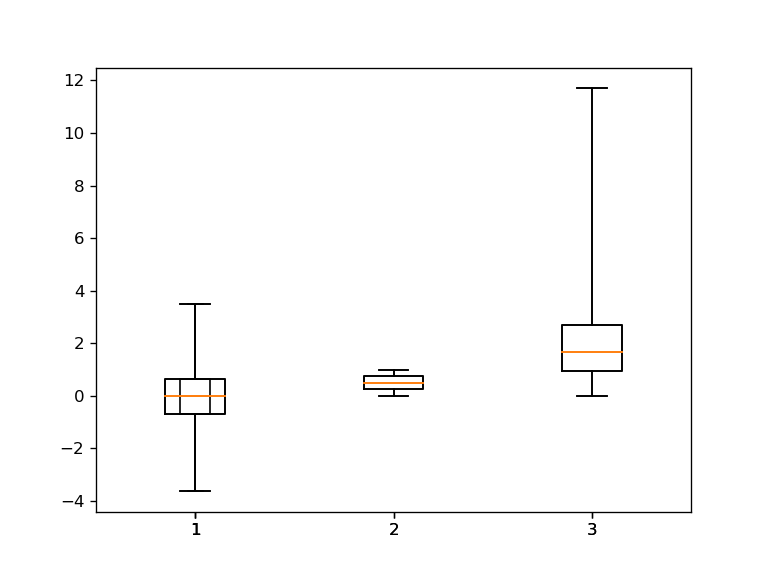

In [56]:
plt.figure()

_ = plt.boxplot(df['normal'], whis = 'range')

#I am using it here because if we don't assign the return value of plotting function to a variable, the Jupiter Notebook will assume that we wanted to print that output.
#Since plotting functions return a list of all of the artists plotted, this would really muddy up our display.

In [58]:
plt.clf # clear the current figure

_ = plt.boxplot([ df['normal'], df['random'], df['gamma']], whis = 'range')

# you can observe max to min values range in the plot

<IPython.core.display.Javascript object>


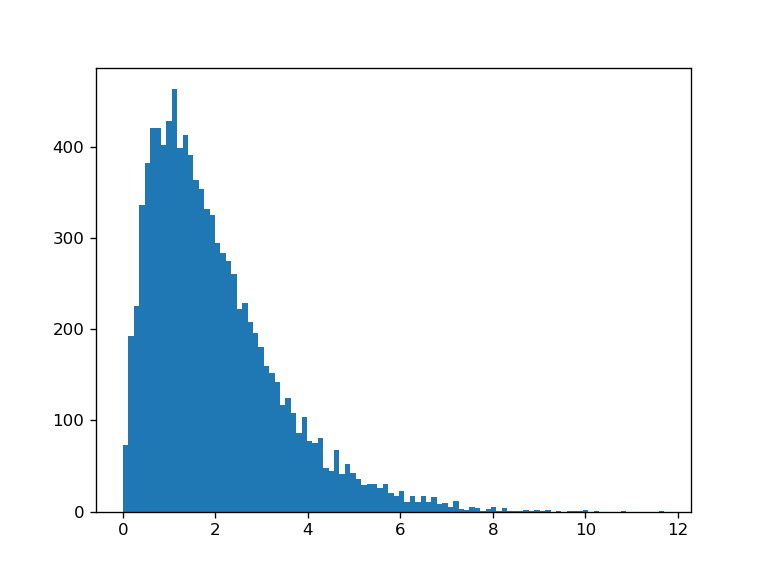

In [59]:
plt.figure()
_ = plt.hist(df['gamma'], bins = 100)

<IPython.core.display.Javascript object>


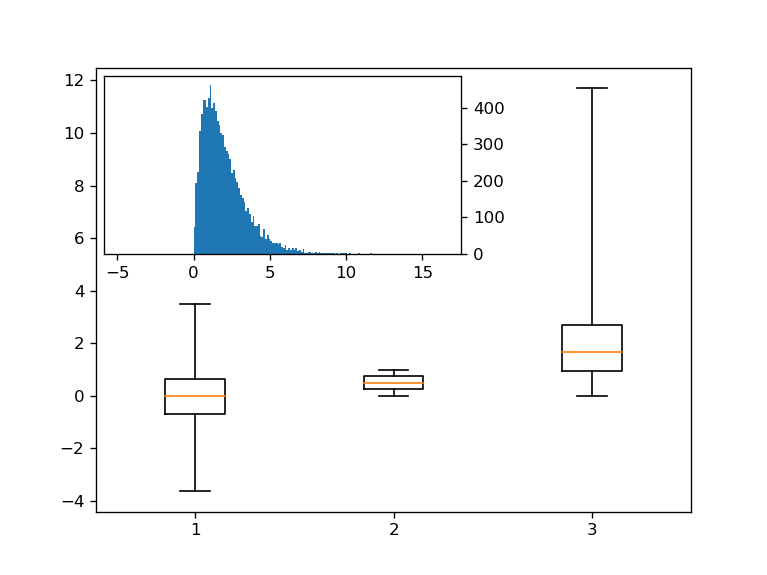

In [61]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis = 'range')

#overlay axis on top of another
ax = mpl_il.inset_axes(plt.gca(), width = '60%', height = '40%', loc = 2) # loc = 2 : top-left
ax.hist(df['gamma'], bins = 100)
ax.margins(x = 0.5)


In [63]:
ax.yaxis.tick_right() # shift y-axis ticks to right side

<IPython.core.display.Javascript object>


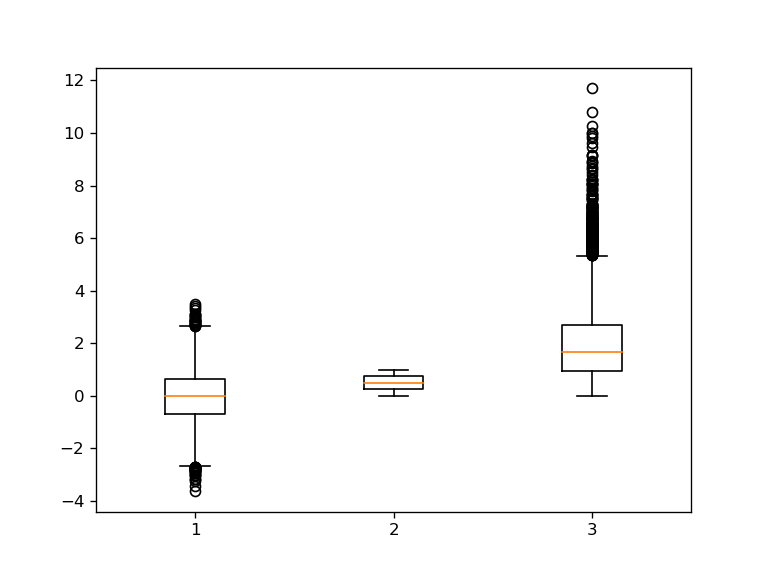

In [65]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']])
# you can observe outliers here

# Heatmaps

<IPython.core.display.Javascript object>


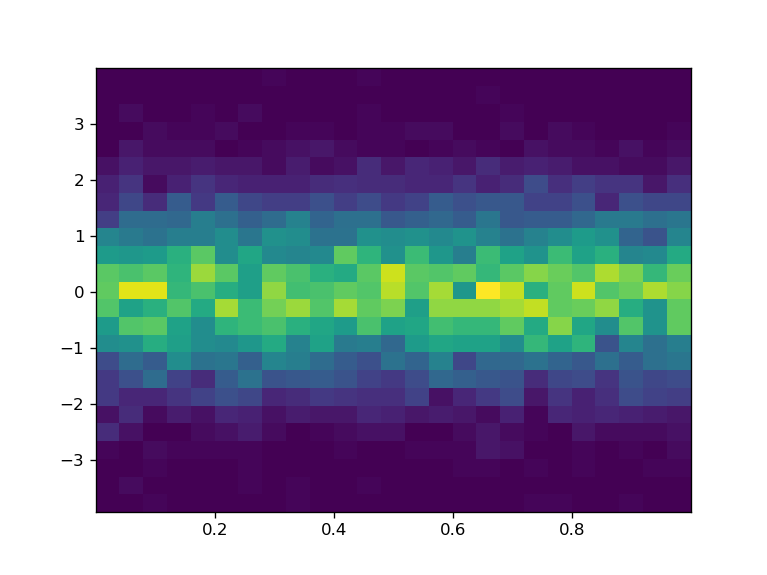

In [66]:
plt.figure()

Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)

_ = plt.hist2d(X, Y, bins = 25)

<IPython.core.display.Javascript object>


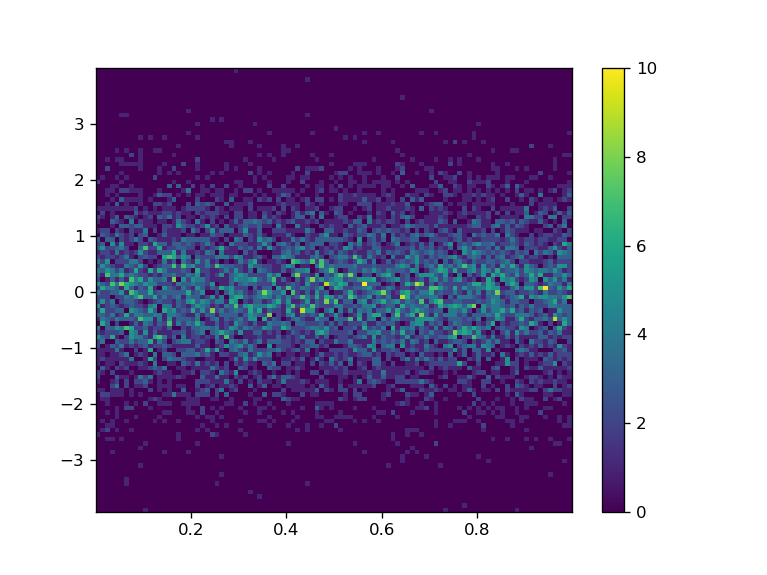

In [67]:
plt.figure()

_ = plt.hist2d(X, Y, bins = 100)

In [68]:
# add colorbar legend
plt.colorbar()

# Animation

In [69]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [98]:
def update(curr): # where curr is current frame
    if curr == n:
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins = bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,25]) # [3,25] is the pos of annotate in the plane

<IPython.core.display.Javascript object>


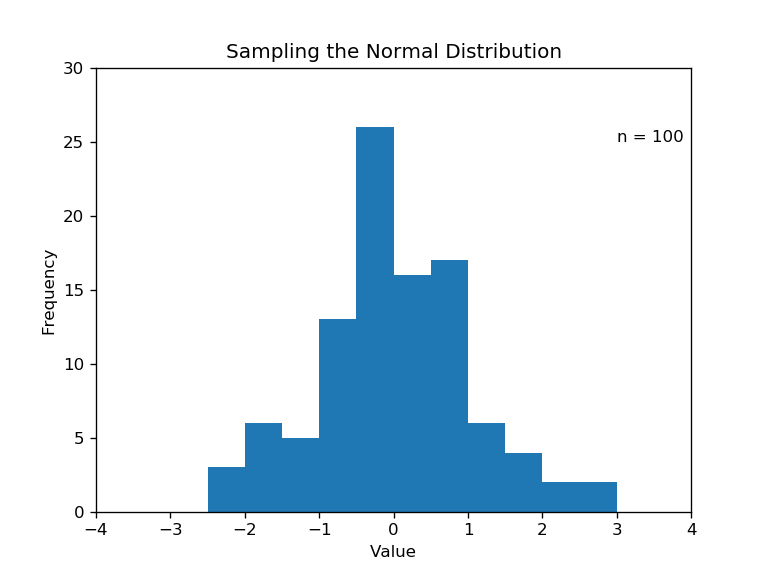

In [100]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval = 100)

# Interactivity

<IPython.core.display.Javascript object>


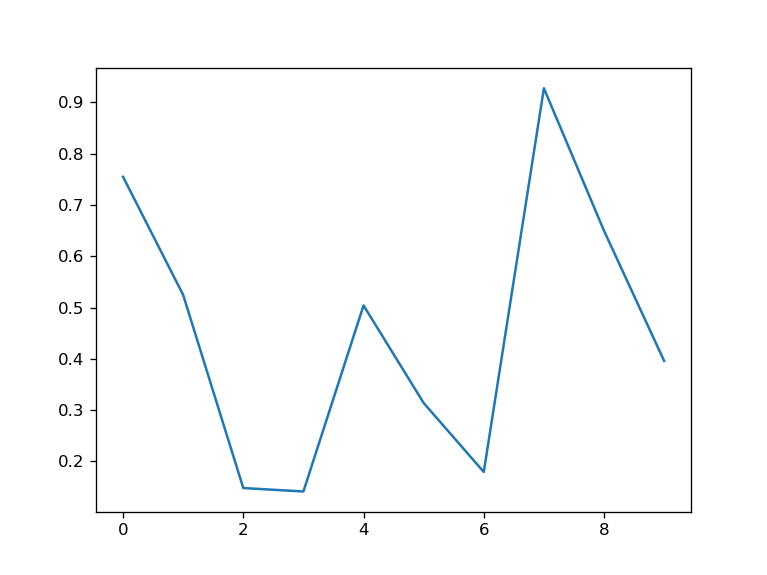

In [82]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

<IPython.core.display.Javascript object>


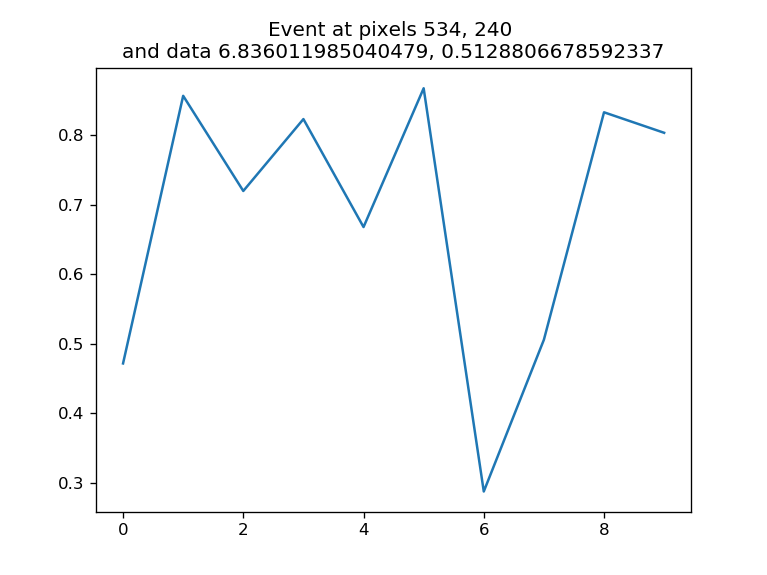

7

In [86]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla() # clear axes
    plt.plot(data)
    plt.gca().set_title('Event at pixels {}, {} \nand data {}, {}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [89]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10), 
                   'weight': np.random.rand(10),
                   'origin': origins})

df

height    weight   origin
0  0.851823  0.676910   Brazil
1  0.825892  0.005074    Chile
2  0.700629  0.713299    India
3  0.261948  0.274837   Mexico
4  0.779789  0.443650  Germany
5  0.475139  0.304733       UK
6  0.872831  0.207402     Iraq
7  0.283953  0.726961    China
8  0.061128  0.176573   Canada
9  0.135635  0.086281      USA

<IPython.core.display.Javascript object>


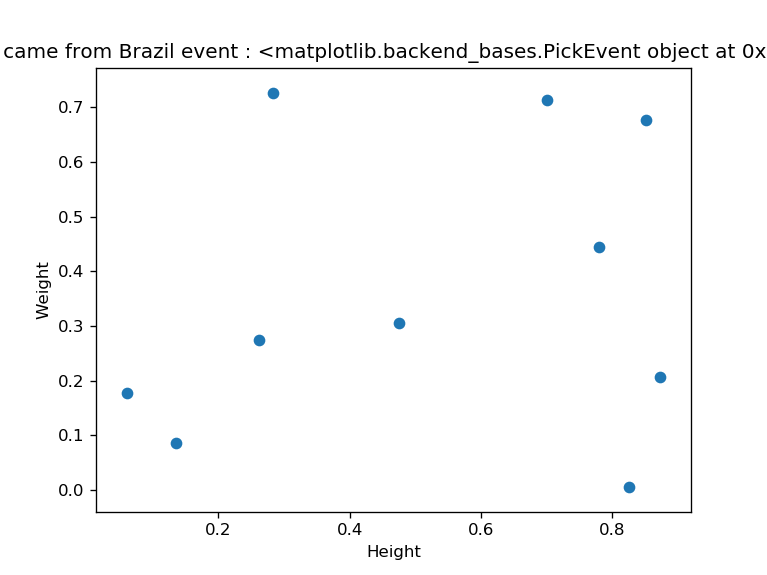

Text(0.5, 0, 'Height')

In [90]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker = 5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [95]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))
    
plt.gcf().canvas.mpl_connect('pick_event', onpick)

11

<br>

# Plotting with Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
plt.style.available

['seaborn-pastel',
 'dark_background',
 'seaborn-darkgrid',
 'fivethirtyeight',
 'seaborn-deep',
 'seaborn-muted',
 'grayscale',
 'bmh',
 'fast',
 'seaborn-notebook',
 'seaborn-whitegrid',
 'seaborn-bright',
 'seaborn-paper',
 '_classic_test',
 'tableau-colorblind10',
 'classic',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn',
 'Solarize_Light2',
 'seaborn-talk',
 'seaborn-colorblind',
 'ggplot',
 'seaborn-dark-palette',
 'seaborn-poster',
 'seaborn-dark']

In [3]:
plt.style.use('seaborn-dark-palette')

## DataFrame.plot

In [5]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0),
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20},
                    index = pd.date_range('21/06/2020', periods = 365))
df.head()

A          B          C
2020-06-21 -1.085631  20.059291 -20.230904
2020-06-22 -0.088285  21.803332 -16.659325
2020-06-23  0.194693  20.835588 -17.055481
2020-06-24 -1.311601  21.255156 -17.093802
2020-06-25 -1.890202  21.462083 -19.518638

<IPython.core.display.Javascript object>


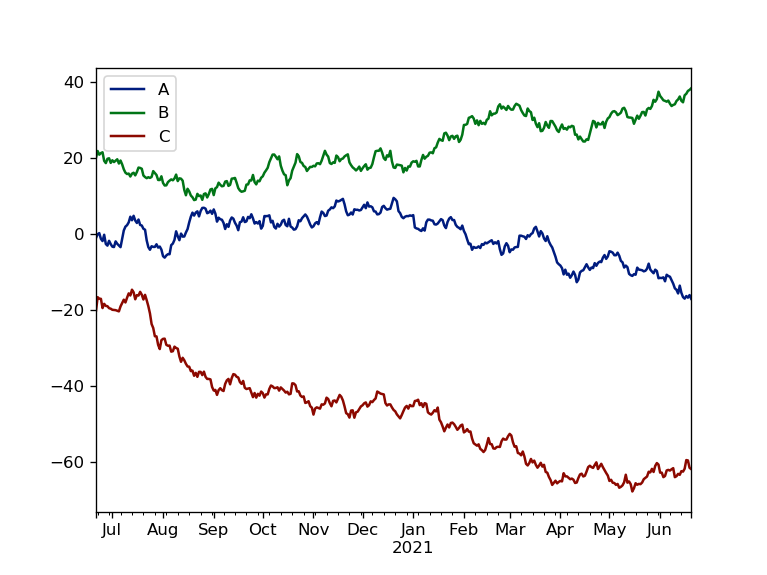

In [6]:
df.plot()

<IPython.core.display.Javascript object>


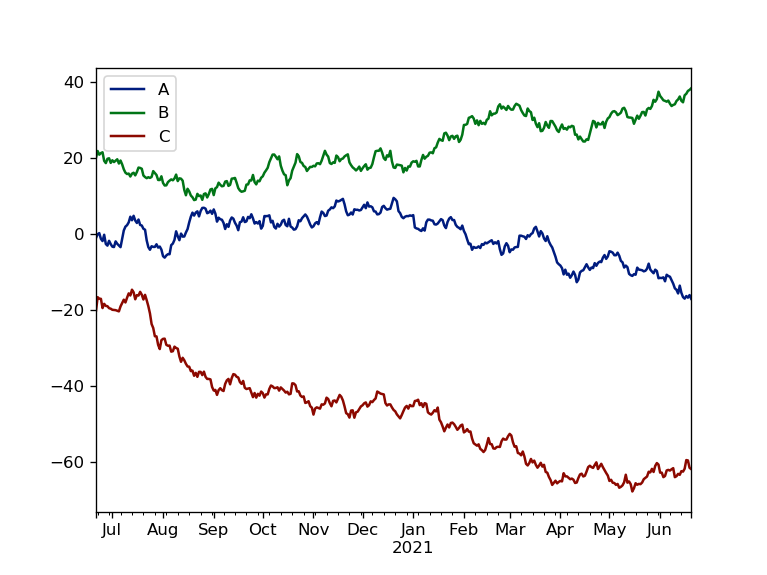

In [9]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

<br><br>

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

<IPython.core.display.Javascript object>


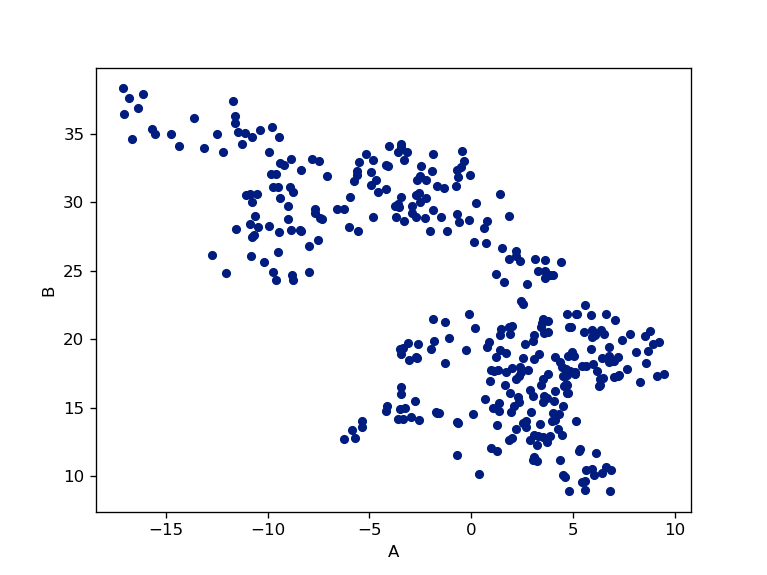

In [10]:
df.plot('A', 'B', kind = 'scatter')

<IPython.core.display.Javascript object>


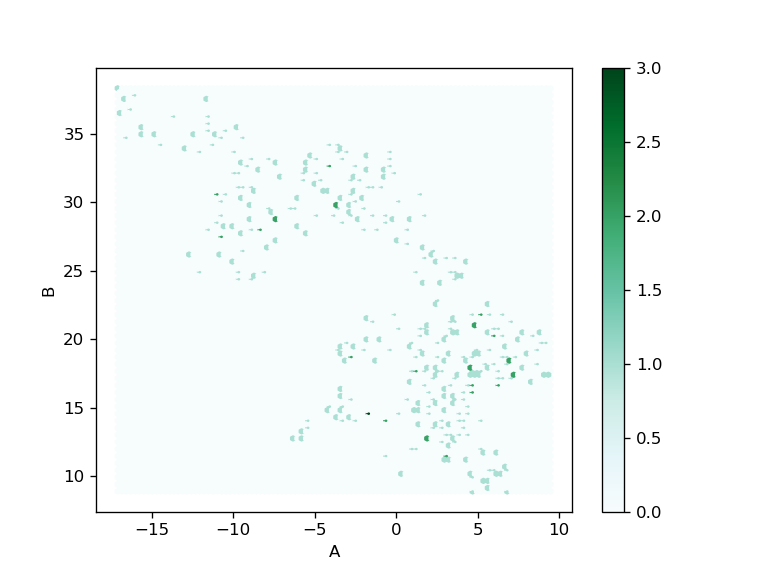

In [13]:
df.plot('A', 'B',  kind = 'hexbin')

<IPython.core.display.Javascript object>


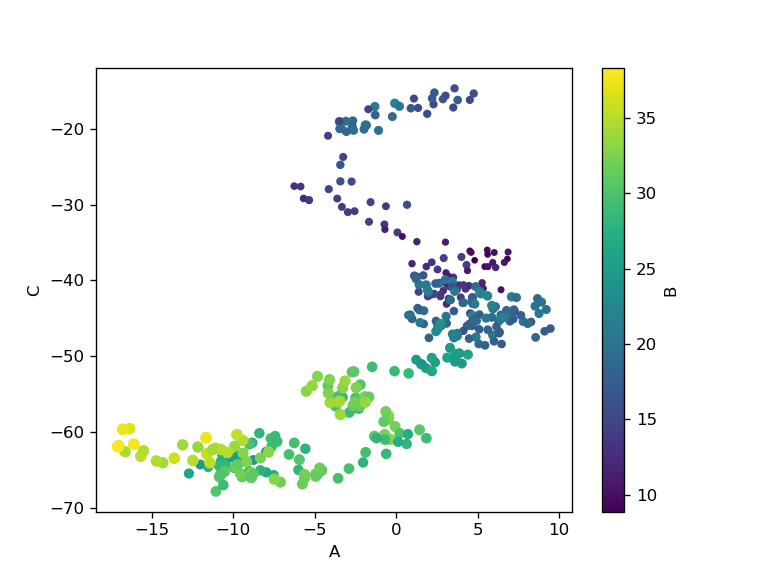

In [15]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'

#df.plot('A', 'C', c = 'B', s = df['B'], kind = 'scatter', colormap='viridis') or
df.plot.scatter('A', 'C', c = 'B', s = df['B'], colormap='viridis')

<IPython.core.display.Javascript object>


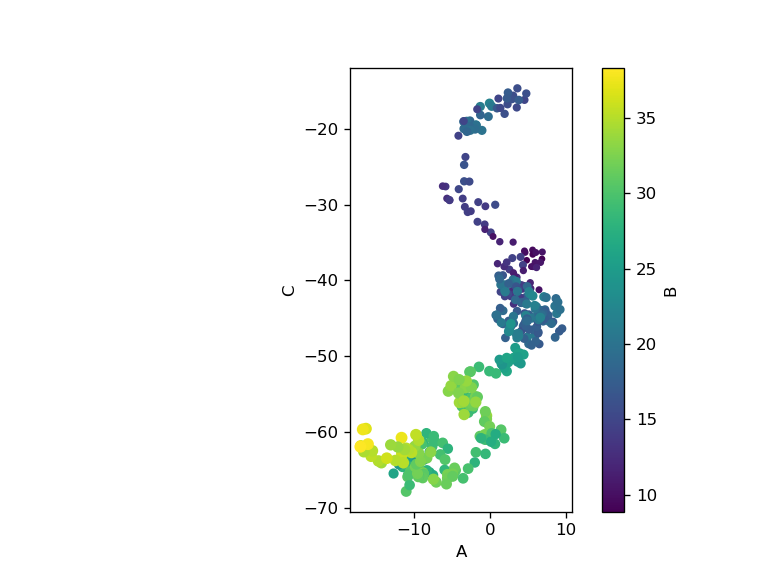

In [17]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

# observe the range of A and C for same amount of sample size

<IPython.core.display.Javascript object>


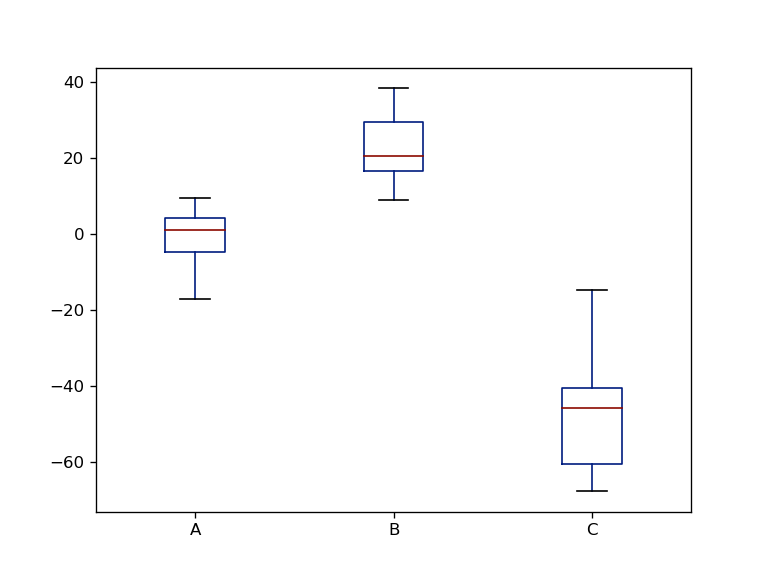

In [18]:
# box plot

df.plot.box()

<IPython.core.display.Javascript object>


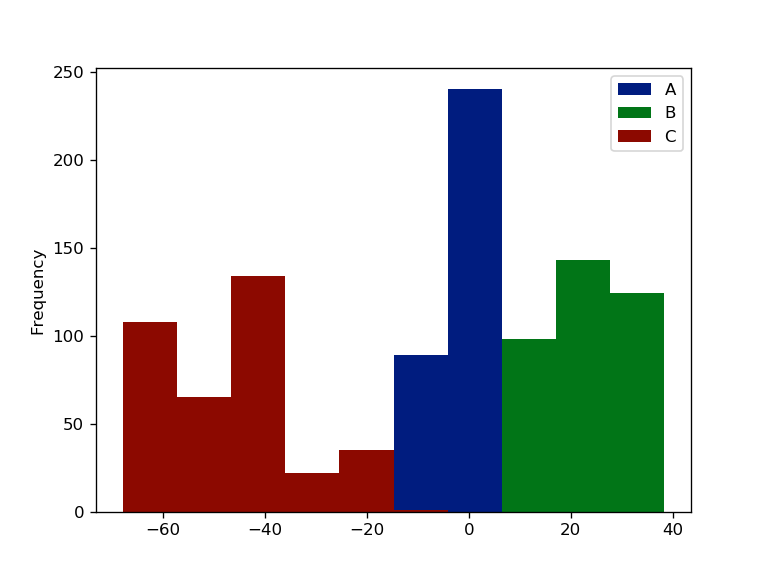

<IPython.core.display.Javascript object>


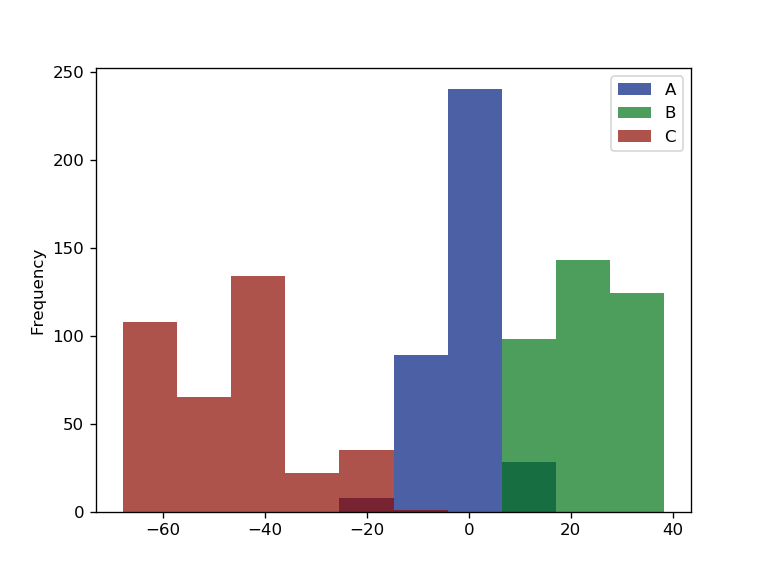

In [20]:
# Histogram Plot

df.plot.hist()
df.plot.hist(alpha = 0.7)

<IPython.core.display.Javascript object>


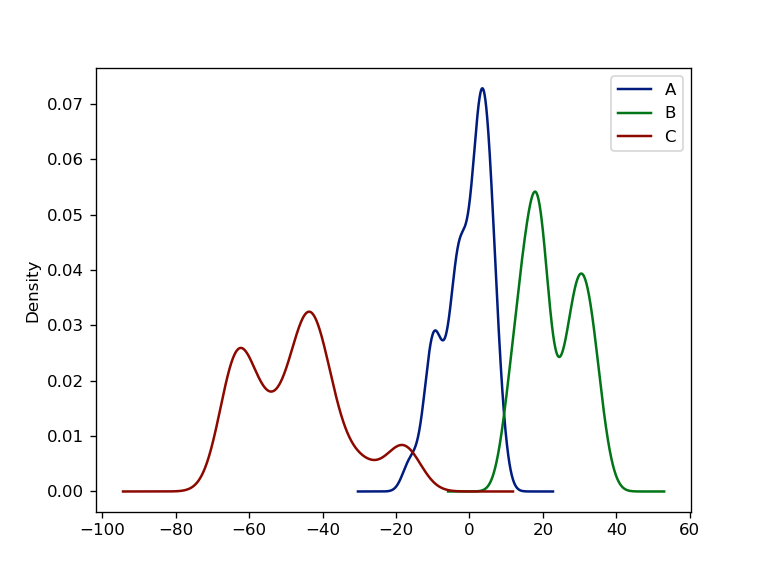

In [21]:
# Kernel density estimation(KDE) plots are useful for deriving a smooth continuous function from a given sample.

df.plot.kde()

<br><br>

## Pandas.plotting

In [23]:
iris_df = pd.read_csv('iris.csv')
iris_df.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

<IPython.core.display.Javascript object>


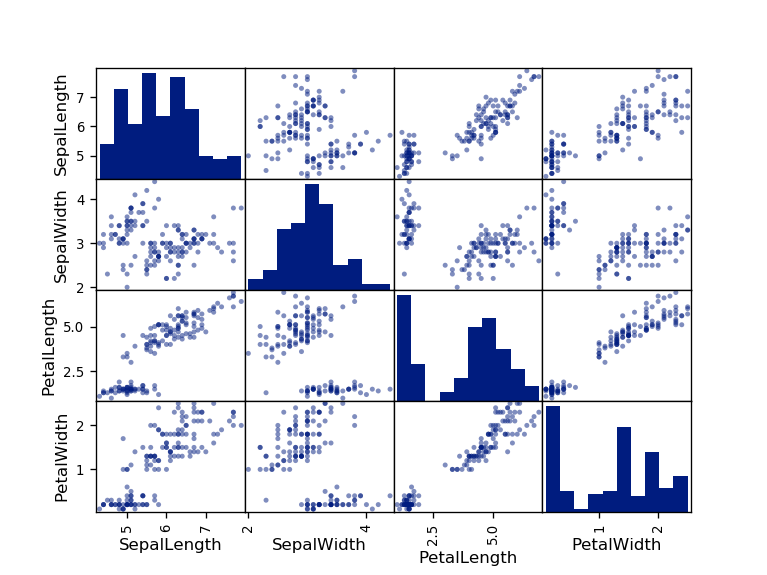

In [31]:
pd.plotting.scatter_matrix(iris_df);

<IPython.core.display.Javascript object>


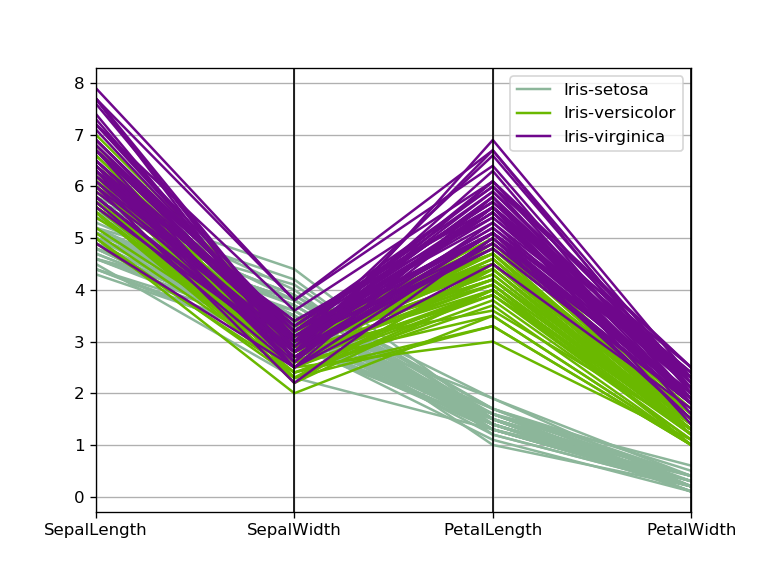

In [29]:
plt.figure()
pd.plotting.parallel_coordinates(iris_df, 'Name')

<br><br>

# Seaborn

Visualization library based on matplotlib

In [33]:
import seaborn as sns

%matplotlib notebook

In [34]:
np.random.seed(123)

v1 = pd.Series(np.random.normal(0, 10 , 1000), name = 'v1')
v2 = pd.Series(2*v1 + np.random.normal(60, 15, 1000), name = 'v2')

<IPython.core.display.Javascript object>


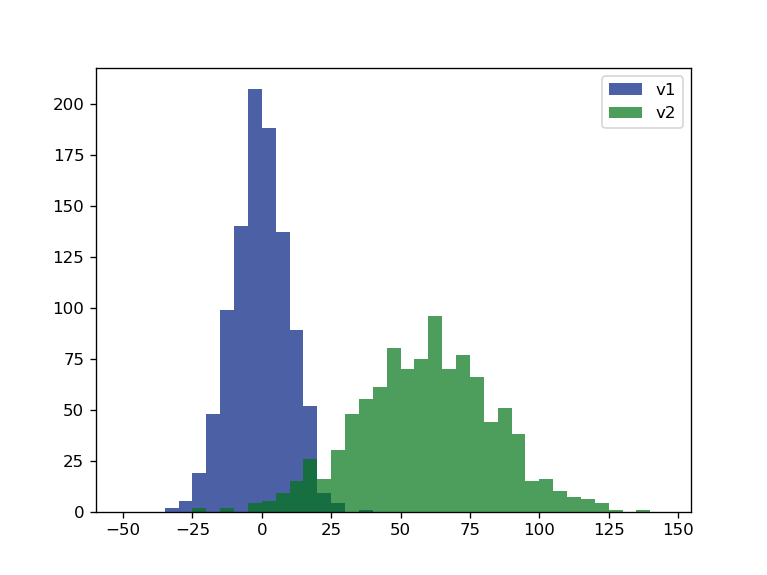

In [36]:
plt.figure()

plt.hist(v1, alpha = 0.7, bins = np.arange(-50, 150, 5), label = 'v1');
plt.hist(v2, alpha = 0.7, bins = np.arange(-50, 150, 5), label = 'v2');
plt.legend();

<IPython.core.display.Javascript object>


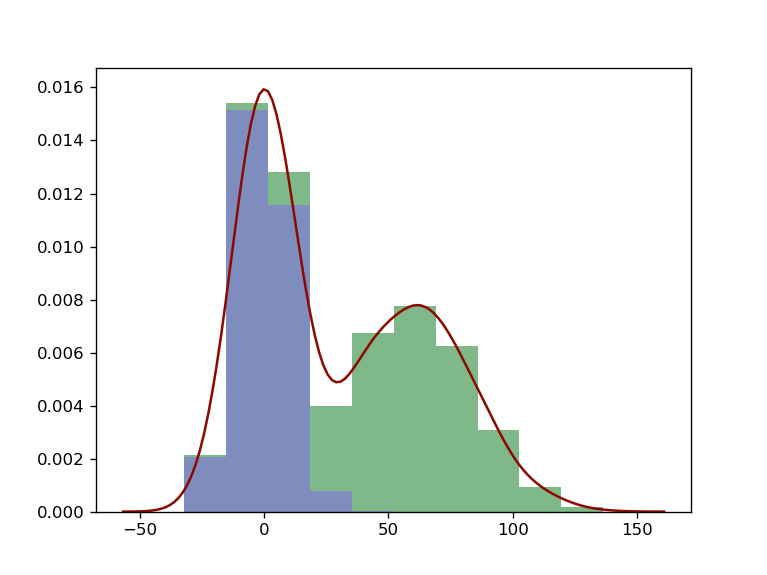

In [38]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype = 'barstacked', alpha = 0.5, density = True);

v3 = np.concatenate((v1, v2))
sns.kdeplot(v3);

<IPython.core.display.Javascript object>


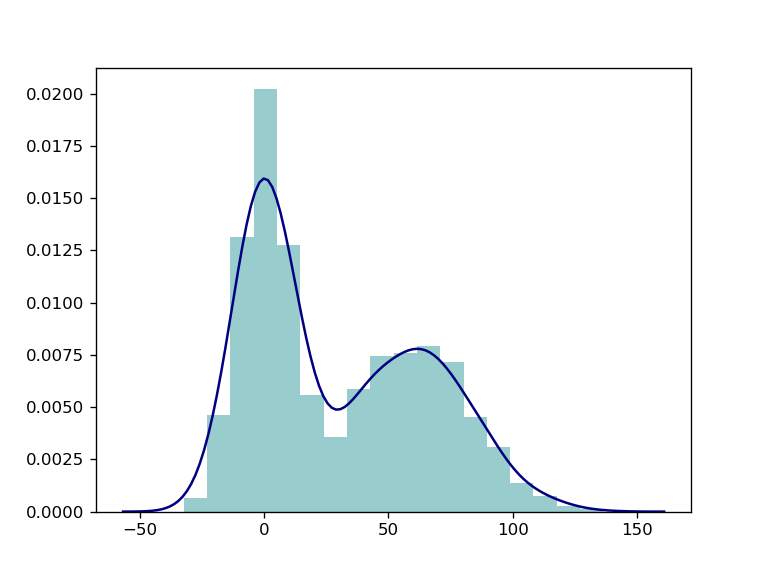

In [40]:
plt.figure()

# distplot

# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws = {'color': 'Teal'}, kde_kws = {'color': 'Navy'});

<IPython.core.display.Javascript object>


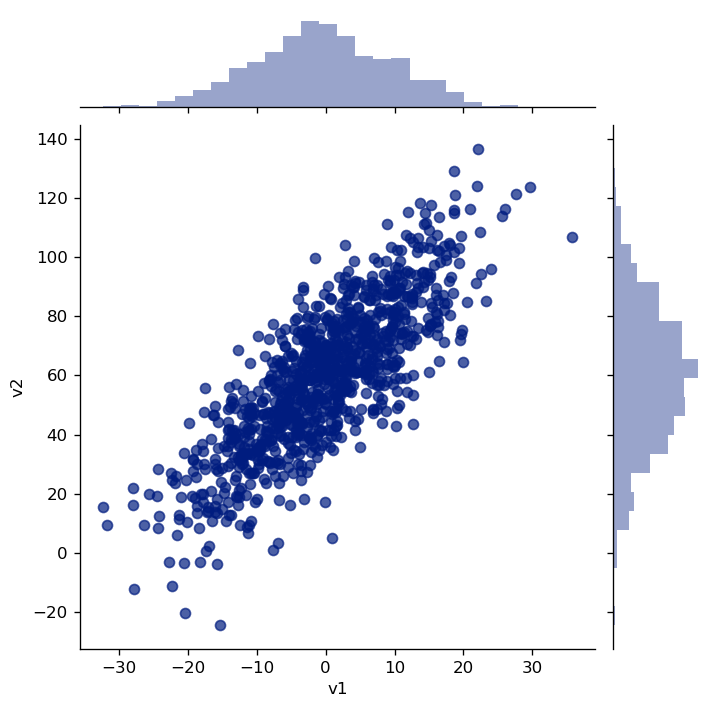

In [41]:
# jointplot

sns.jointplot(v1, v2, alpha = 0.7)

<IPython.core.display.Javascript object>


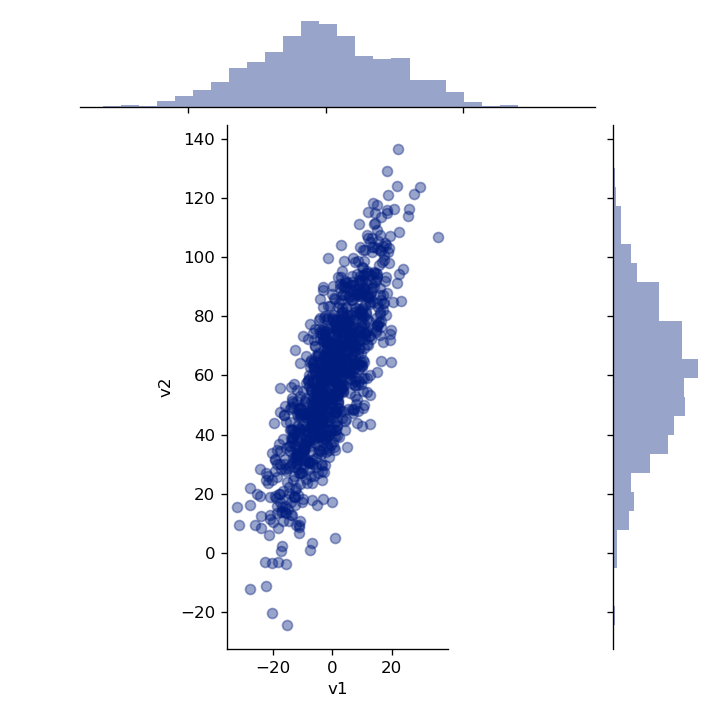

In [44]:
grid = sns.jointplot(v1, v2, alpha = 0.4);
grid.ax_joint.set_aspect('equal')

<IPython.core.display.Javascript object>


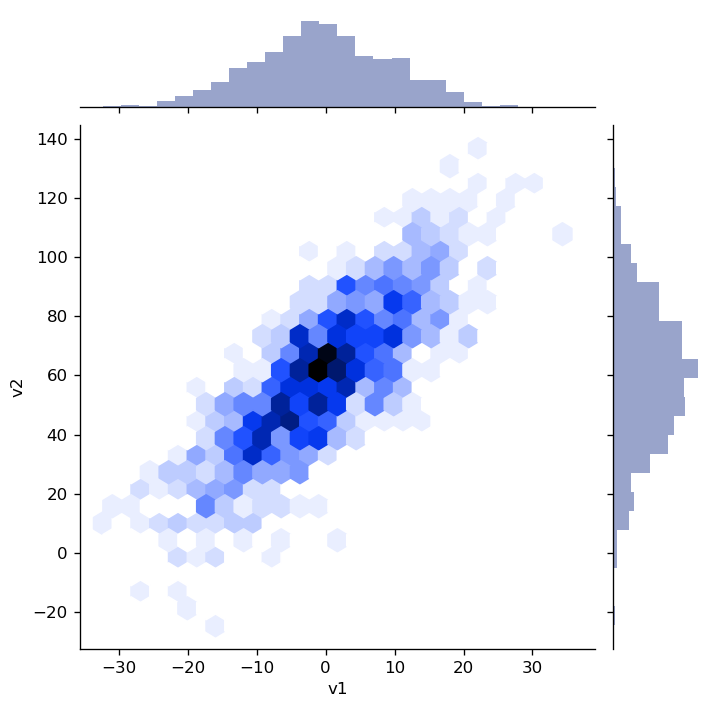

In [45]:
sns.jointplot(v1, v2, kind = 'hex')

<IPython.core.display.Javascript object>


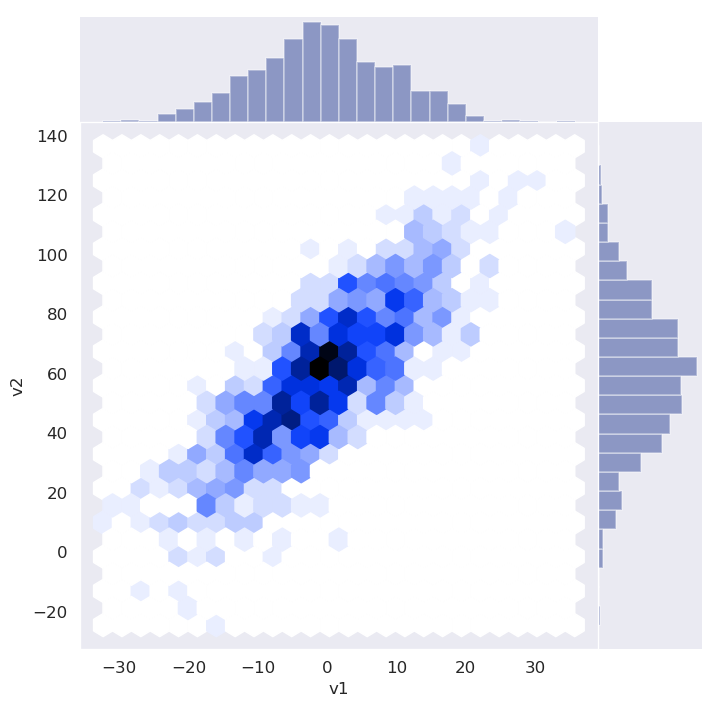

In [49]:
# set the seaborn style for all the following plots

sns.set_style('dark')
#sns.set_style('white')
sns.jointplot(v1, v2, kind = 'hex', space = 0)

In [50]:
iris_df = pd.read_csv('iris.csv')
iris_df.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

<IPython.core.display.Javascript object>


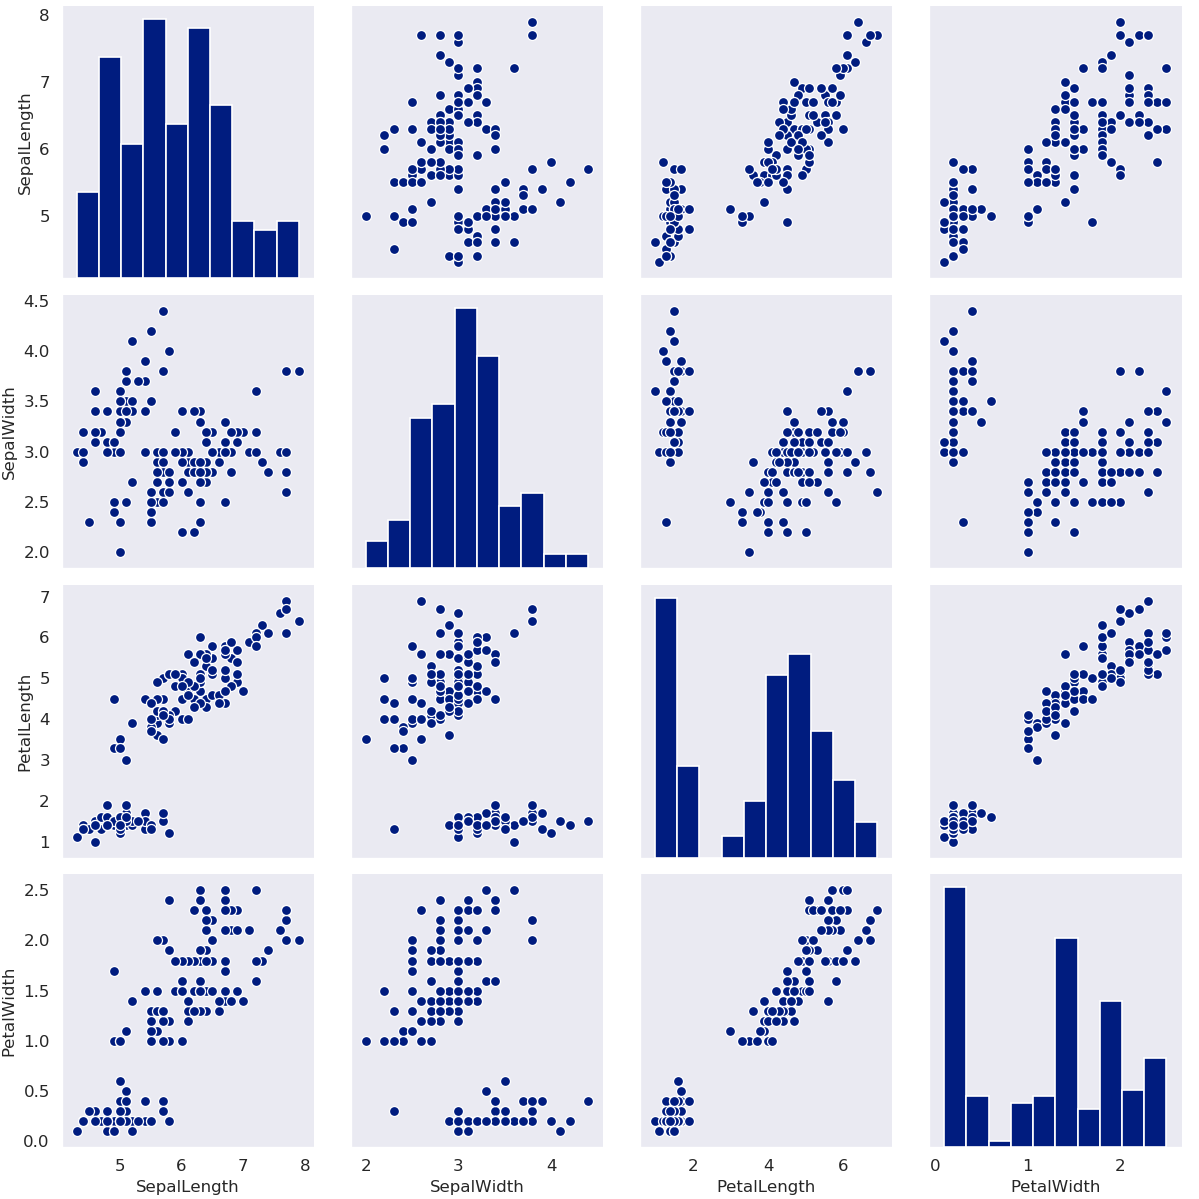

In [51]:
# pair plot

sns.pairplot(iris_df)

<IPython.core.display.Javascript object>


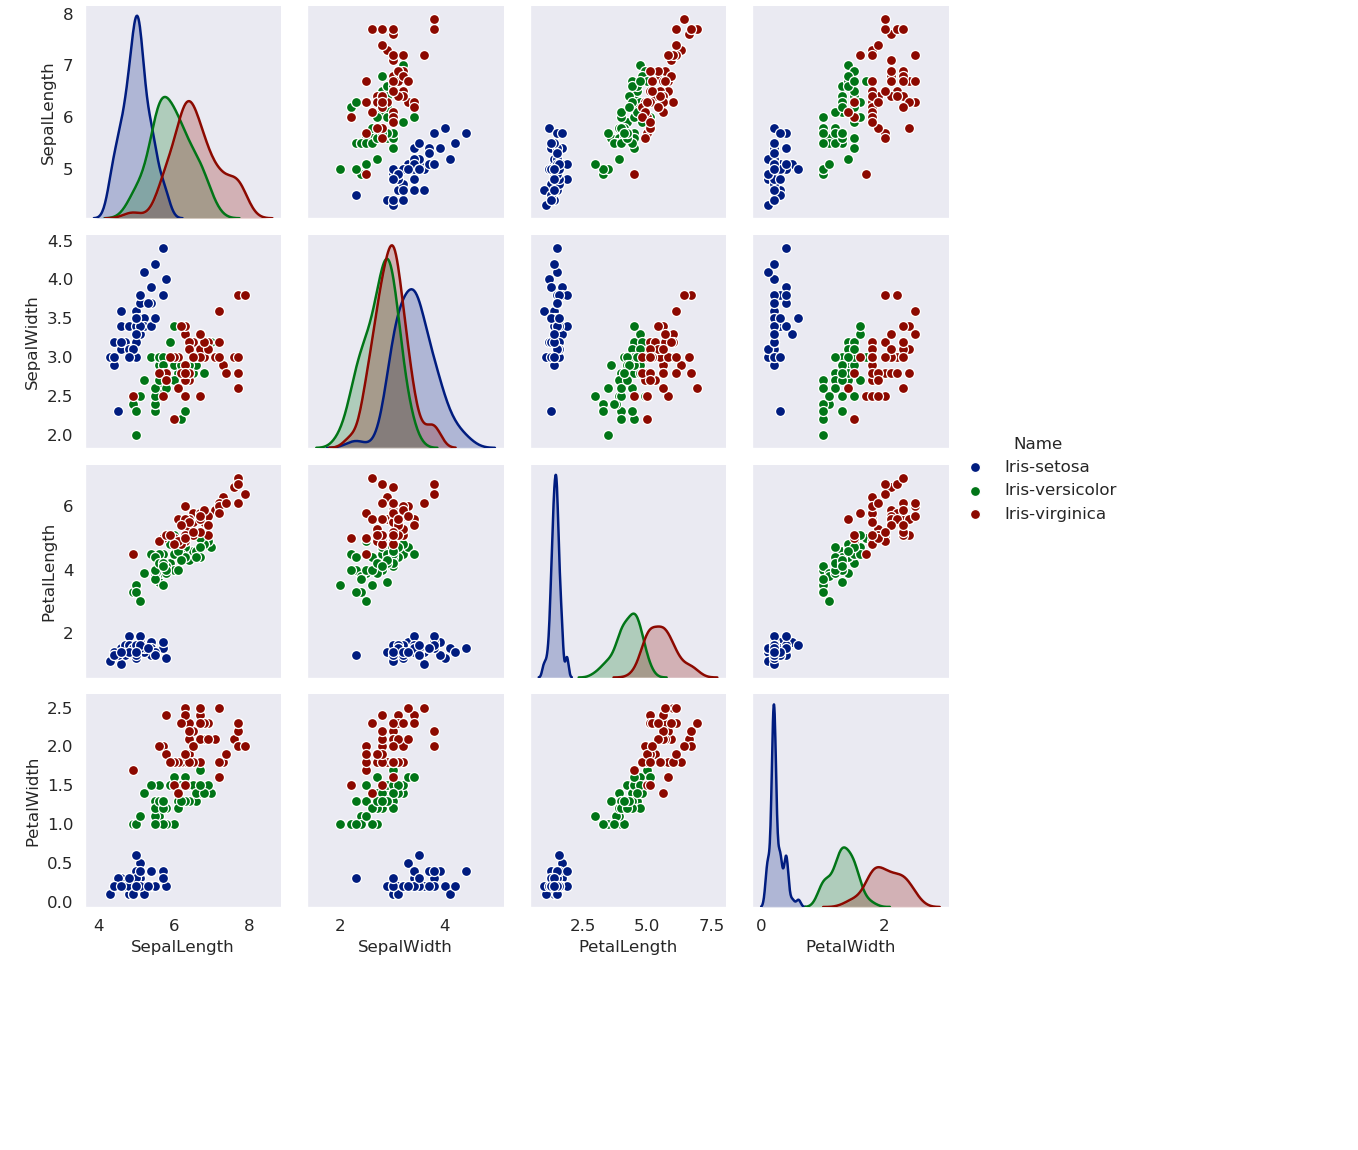

In [54]:
sns.pairplot(iris_df, hue = 'Name', diag_kind = 'kde', height = 2)

<IPython.core.display.Javascript object>


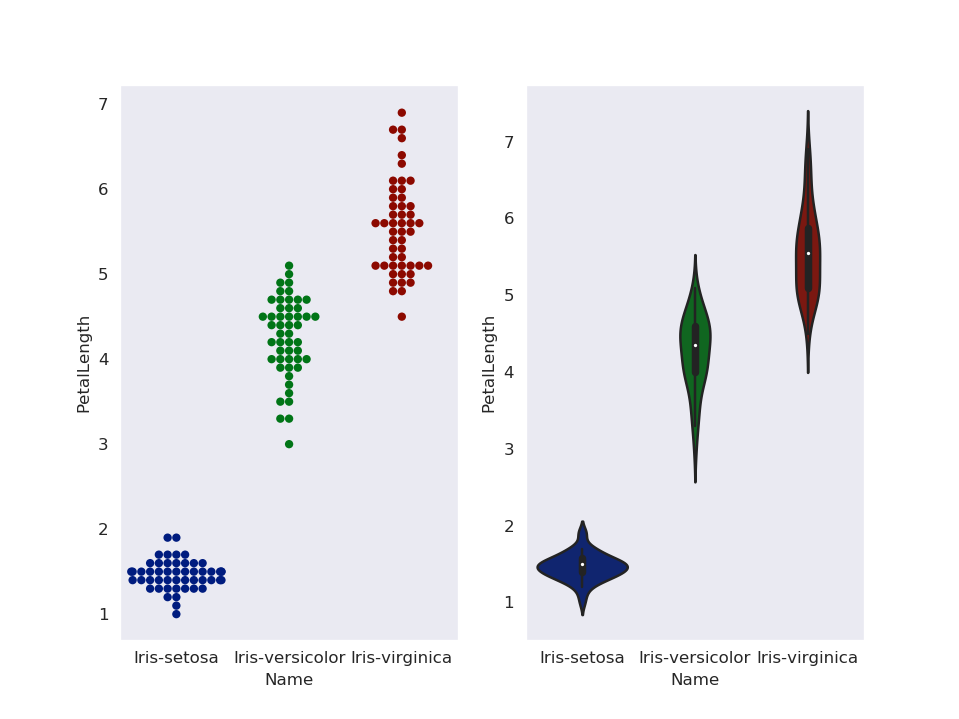

In [56]:
# swarm plot and violin plot

plt.figure(figsize = (8,6))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data = iris_df)
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data = iris_df) # violin plots convey more info than box plots

<br><br><br>

## The spurious correlations website lists a number of correlations which exist but seem unlikely to be causally related to one another.

<br>

http://www.tylervigen.com/spurious-correlations